#Meg's Data

In [4]:
from __future__ import division

%matplotlib inline
import pandas as pd
import thinkdsp
import thinkplot
import autocorr
import numpy as np

In [5]:
#Ryan's fancy way of inputting data in an easier way
data_dict = {}
name = 'dennis'
acts = ['walking', 'jogging', 'upstairs', 'downstairs']
data_file_names = ['data/{}_{}_long.csv'.format(name, activity) for activity in acts]
for i,file in enumerate(data_file_names):
    df = pd.read_csv(file)
    data_dict[acts[i]] = df
    print df

              x          y         z           time
0     -4.590283  -8.205527  1.548450  1430066134259
1     -4.669292  -8.217499  2.177526  1430066134439
2     -4.509479  -8.155848  2.326566  1430066134620
3     -4.317344  -8.166023  2.051831  1430066134800
4     -4.507683  -8.309077  2.343325  1430066134980
5     -4.373608  -8.143877  2.239177  1430066135161
6     -4.547188  -8.118139  2.279280  1430066135342
7     -4.534020  -8.113351  2.328960  1430066135521
8     -4.574721  -8.176199  2.434903  1430066135701
9     -4.617816  -8.047510  2.480992  1430066135880
10    -2.523489  -8.280945  2.298433  1430066139844
11    -3.834314  -9.417592  1.381454  1430066140024
12    -2.877232 -11.066000  3.256713  1430066140204
13    -0.425569 -11.484387  3.116652  1430066140385
14    -2.476802  -7.574655  2.266112  1430066140565
15    -1.358710  -3.013103  2.944270  1430066140745
16    -6.949171 -11.131841  6.762423  1430066140926
17    -7.898471  -9.352350  2.344522  1430066141105
18    -2.592

In [6]:
def evenly_sample_ts(ts):
    return np.linspace(ts.min(), ts.max(), len(ts))

###Data viewing of full data set

c:\Users\mmccauley\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


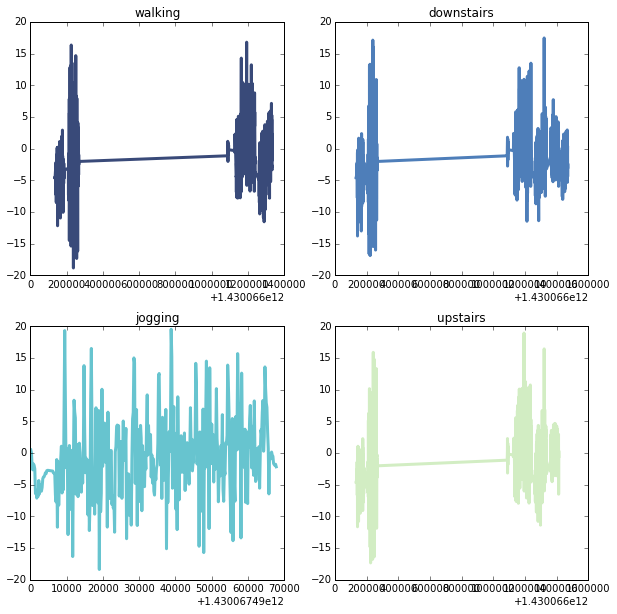

In [7]:
thinkplot.preplot(4, 2, 2)

for plotnum, (activity, data) in enumerate(data_dict.iteritems()):
    time = data.time.values
    vals = data.x.values
    evenly_sampled_ts = evenly_sample_ts(time)
    interp_vals = np.interp(evenly_sampled_ts, time, vals)
    
    thinkplot.subplot(plotnum+1)
    thinkplot.plot(evenly_sampled_ts, interp_vals)
    thinkplot.config(title=activity)

###Plot the wave

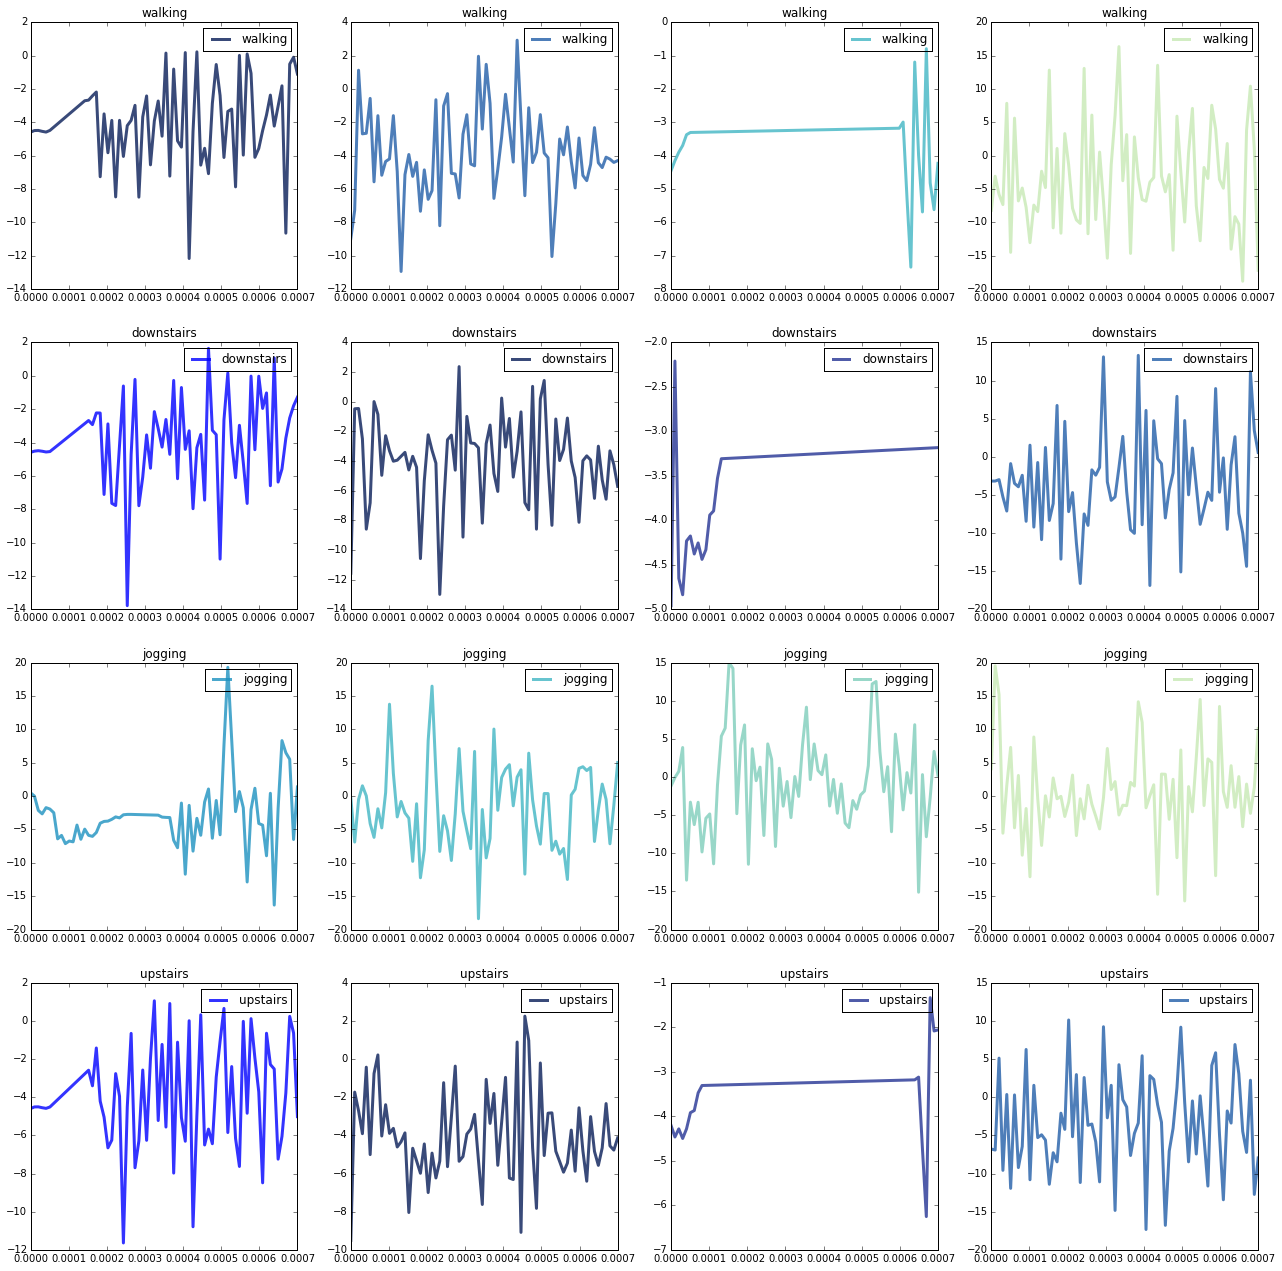

In [8]:
thinkplot.preplot(4, 4, 4)

for plotnum, (activity, data) in enumerate(data_dict.iteritems()):
    time = data.time.values
    vals = data.x.values
    evenly_sampled_ts = evenly_sample_ts(time)
    interp_vals = np.interp(evenly_sampled_ts, time, vals)
    zwave = thinkdsp.Wave(interp_vals, framerate=100000)

    start0 = 0
    window_size = 0.0007
    seg_nums = 4
    
    for i in range(seg_nums):
        zseg = zwave.segment(start=start0+i*window_size, duration=window_size)
        thinkplot.subplot(4*plotnum+1+i)
        zseg.plot(label=activity)
        thinkplot.Config(title=activity)

###Plotting spectrums

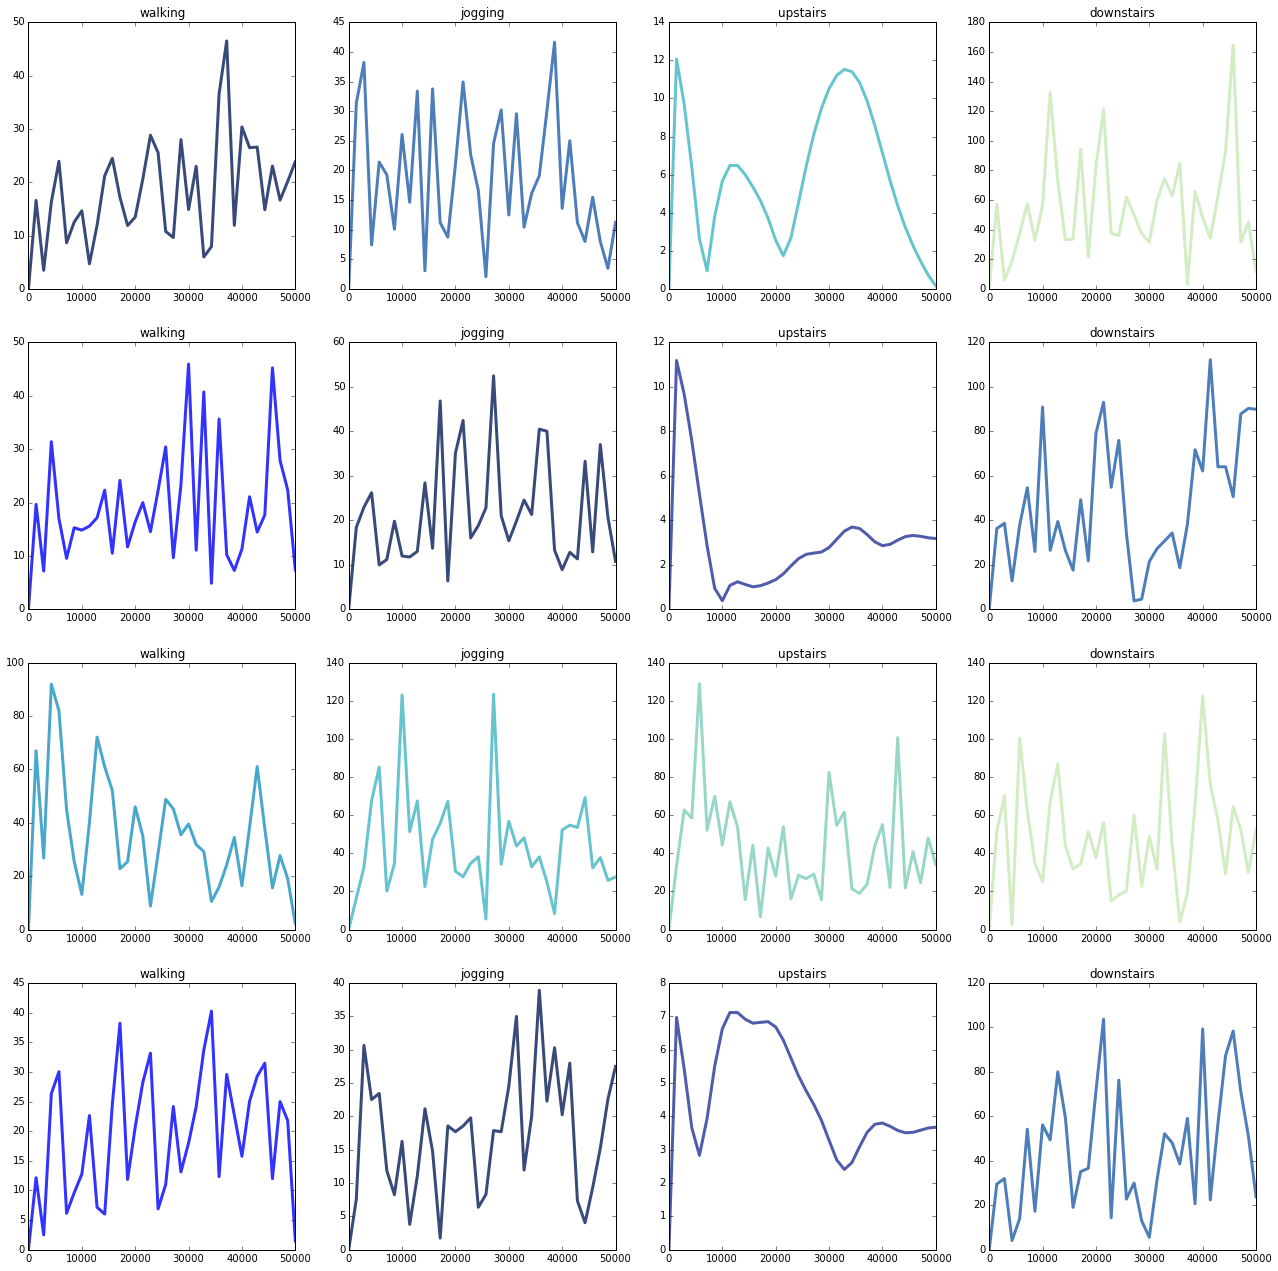

In [31]:
# Get ready to plot 2 subplots as a 4x2 grid
thinkplot.preplot(4, 4, 4)

for plotnum, (activity, data) in enumerate(data_dict.iteritems()):
    time = data.time.values
    vals = data.x.values
    evenly_sampled_ts = evenly_sample_ts(time)
    interp_vals = np.interp(evenly_sampled_ts, time, vals)
    zwave = thinkdsp.Wave(interp_vals, framerate=100000)
    
    start0 = 0
    window_size = 0.0007
    seg_nums = 4
    
    matrix = []
    
    for i in range(seg_nums):
        zseg = zwave.segment(start=start0+i*window_size, duration=window_size)
        zseg.unbias()
        zspec = zseg.make_spectrum()
        
        thinkplot.subplot(4*plotnum+1+i)
        
        zspec.plot()
        
        thinkplot.Config(title=acts[i])
        
#         # framerate times indice equals time period
#         #100000*19 = 190000

###Plotting autocorrelation

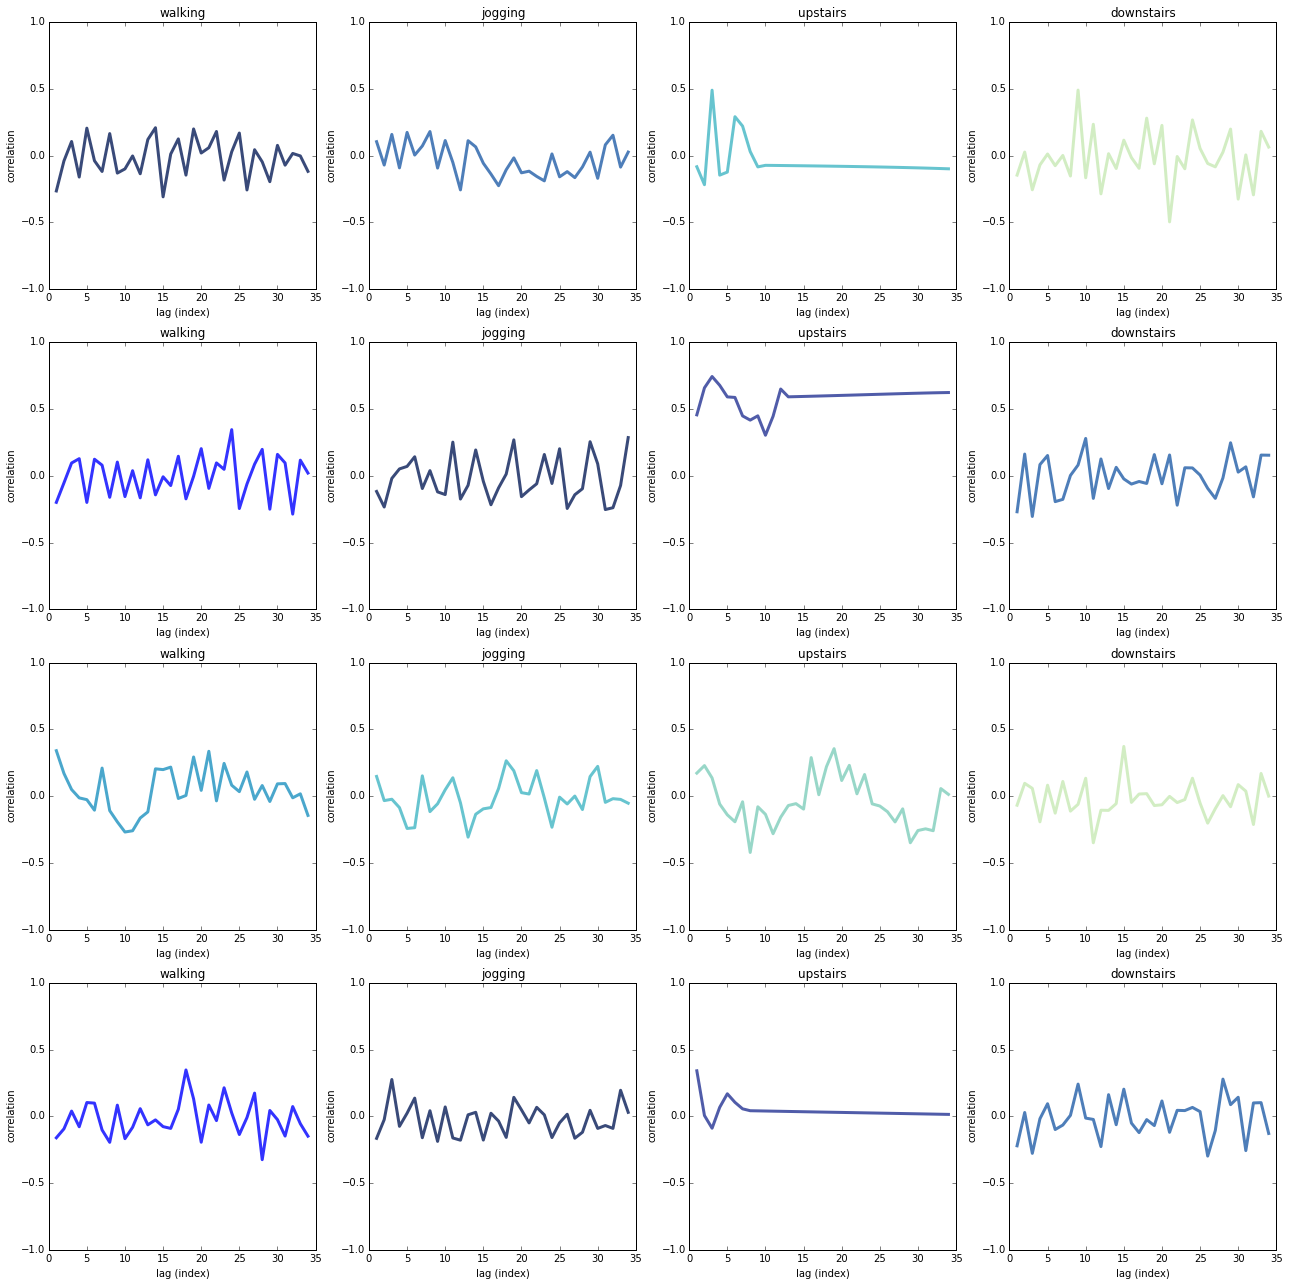

In [25]:
# Get ready to plot 2 subplots as a 4x2 grid
thinkplot.preplot(4, 4, 4)

for plotnum, (activity, data) in enumerate(data_dict.iteritems()):
    time = data.time.values
    vals = data.x.values
    evenly_sampled_ts = evenly_sample_ts(time)
    interp_vals = np.interp(evenly_sampled_ts, time, vals)
    zwave = thinkdsp.Wave(interp_vals, framerate=100000)
    
    start0 = 0
    window_size = 0.0007
    seg_nums = 4
    
    matrix = []
    
    for i in range(seg_nums):
        zseg = zwave.segment(start=start0+i*window_size, duration=window_size)
        
        ## Creating a matrix of fundamental frequencies from the spectrum
        
        #zseg.unbias()
        #spectrum = zseg.make_spectrum()
        #auto_zwave = autocorr.autocorr(zwave)
        #auto_zseg = zwave.segment(start=start0+i*window_size, duration=window_size)
        
        thinkplot.subplot(4*plotnum+1+i)
        
        ## Using example code from chap05
        lags, corrs = autocorr.autocorr(zseg)
        thinkplot.plot(lags[1:len(lags)], corrs[1:len(corrs)])
        thinkplot.config(xlabel='lag (index)', ylabel='correlation', ylim=[-1, 1])
        
#         ## Getting the dominant frequencies
#         dominant_freqs= np.argmax(corrs[1:len(corrs)])+1
#         #argmax() gets the maximum, [1:len(corrs)] cuts off the intial 0 peak and +1 fixes the indices back to the correct place
        
#         print dominant_freqs
        
#        zseg.plot(label=acts[i])
        thinkplot.Config(title=acts[i])
        
#         # framerate times indice equals time period
#         #100000*19 = 190000